In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev

# Machine learning models and tools
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# This is from a different library
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

In [2]:
# Create a dataframe of the csv file
data = pd.read_csv("final_dataset.csv")
data.head()

,category,product name,location,price,overall rating,number sold,total review,customer review,sentiment,region,salary
0,computers and laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,jakarta utara,53500,4.9,5449,2369,Alhamdulillah berfungsi dengan baik. Packaging...,1,dki jakarta,5396760.0
1,computers and laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,tangerang selatan,72000,4.9,2359,1044,"barang bagus dan respon cepat, harga bersaing ...",1,banten,2905119.0
2,computers and laptops,SSD Midasforce 128 Gb - Tanpa Caddy,jakarta barat,213000,5.0,12300,3573,"barang bagus, berfungsi dengan baik, seler ram...",1,dki jakarta,5396760.0
3,computers and laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,jakarta timur,55000,4.7,2030,672,bagus sesuai harapan penjual nya juga ramah. t...,1,dki jakarta,5396760.0
4,computers and laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,jakarta timur,55000,4.7,2030,672,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",1,dki jakarta,5396760.0


In [3]:
x = data[["price","overall rating","sentiment","salary"]]
# x = data[["total review"]] # This feature alone has the highest correlation with the label
y = data["number sold"]

print("x shape:", x.shape)

x shape: (5147, 4)


In [4]:
# Another data split for the x data with no added polynomial features (this is for the tree based models)
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

In [5]:
LR = LinearRegression()
RFR = RandomForestRegressor()
XGB = XGBRegressor()

TRAINING THE MACHINE LEARNING MODELS

In [6]:
# 1. Linear Regression
LR.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# 2. Random Forest Regressora
RFR.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# 3. XGBoost Regressor
XGB.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [9]:
# PREDICTIONS
pred_lr  = LR.predict(x_test)
pred_rf  = RFR.predict(x_test)
pred_xgb = XGB.predict(x_test)

# EVALUATION
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2 ): {r2}")
    print("\n")

evaluate_model(y_test, pred_lr, "Linear Regression")
evaluate_model(y_test, pred_rf, "Random Forest Regressor")
evaluate_model(y_test, pred_xgb, "XGBoost Regressor")

Evaluation Metrics for Linear Regression:
Mean Absolute Error (MAE): 8265.264986313845
Mean Squared Error (MSE): 269551212.4506081
R-squared (R2 ): 0.028235048230113025


Evaluation Metrics for Random Forest Regressor:
Mean Absolute Error (MAE): 1736.1301475473733
Mean Squared Error (MSE): 31091101.136844322
R-squared (R2 ): 0.8879127935577199


Evaluation Metrics for XGBoost Regressor:
Mean Absolute Error (MAE): 2705.14013671875
Mean Squared Error (MSE): 43397140.0
R-squared (R2 ): 0.843548059463501




C:\Users\csalo\AppData\Local\Temp\ipykernel_28880\1081100208.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


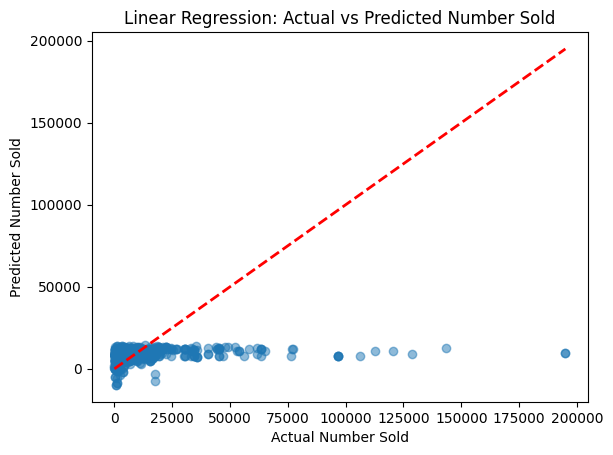

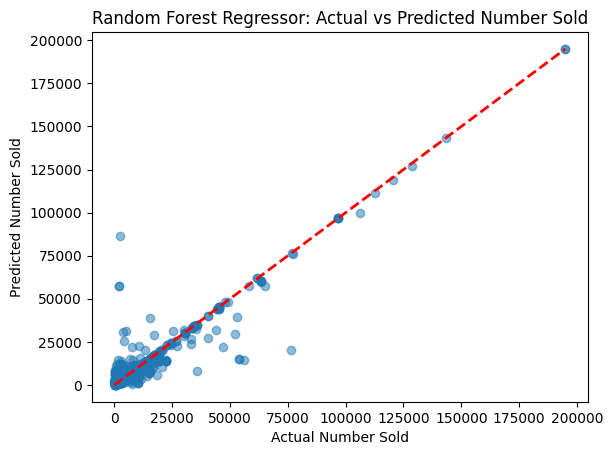

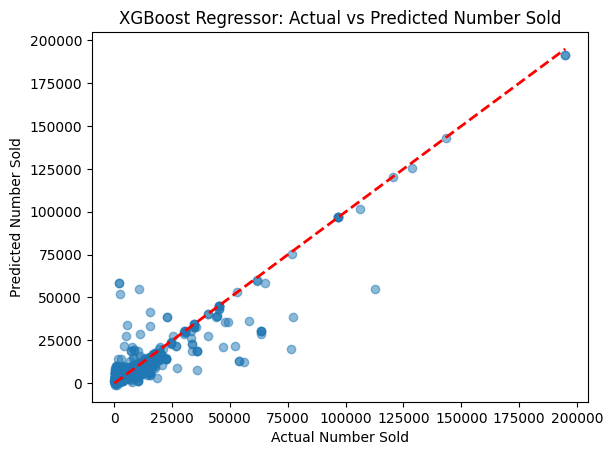

In [10]:
# Actual prediction vs predicted plot for the best model
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Number Sold")
    plt.ylabel("Predicted Number Sold")
    plt.title(f"{model_name}: Actual vs Predicted Number Sold")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
    plt.show()

plot_actual_vs_predicted(y_test, pred_lr, "Linear Regression")
plot_actual_vs_predicted(y_test, pred_rf, "Random Forest Regressor")
plot_actual_vs_predicted(y_test, pred_xgb, "XGBoost Regressor")

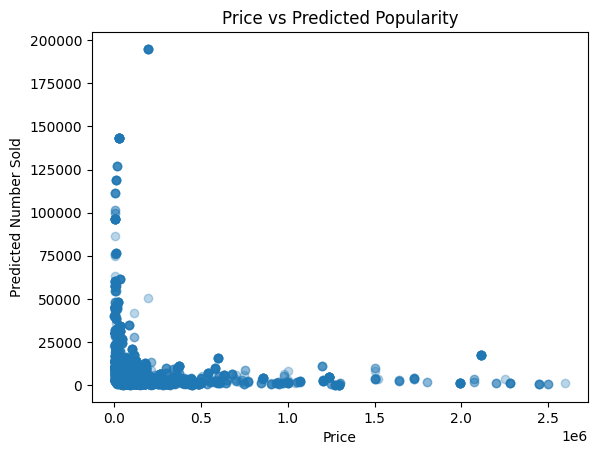

In [11]:
# Finding the optimal price ranges using the dataset, by plotting the prices vs predicted number sold
data["predicted sold"] = RFR.predict(x)
plt.scatter(data["price"], data["predicted sold"], alpha=0.3)
plt.xlabel("Price")
plt.ylabel("Predicted Number Sold")
plt.title("Price vs Predicted Popularity")
plt.show()

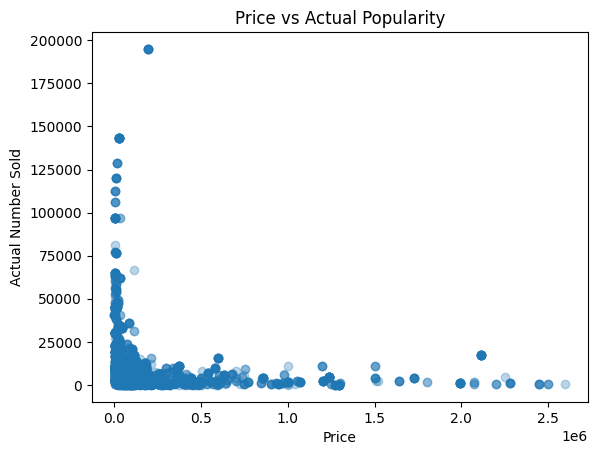

In [12]:
plt.scatter(data["price"], data["number sold"], alpha=0.3)
plt.xlabel("Price")
plt.ylabel("Actual Number Sold")
plt.title("Price vs Actual Popularity")
plt.show()

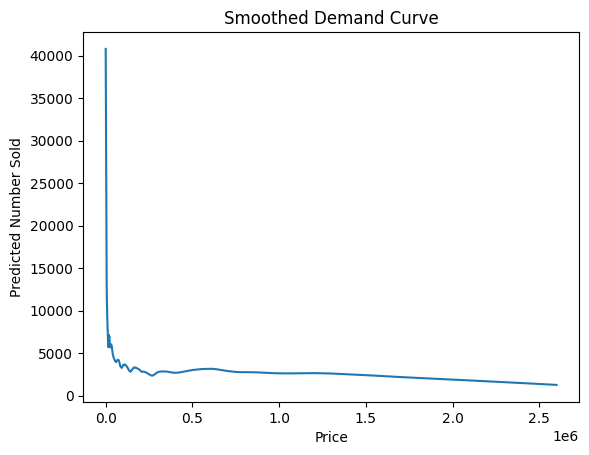

In [13]:
from statsmodels.nonparametric.smoothers_lowess import lowess

data_smooth = data[["price", "predicted sold"]].dropna().sort_values("price")
smooth = lowess(data_smooth["predicted sold"], data_smooth["price"], frac=0.12)

plt.plot(smooth[:,0], smooth[:,1])
plt.xlabel("Price")
plt.ylabel("Predicted Number Sold")
plt.title("Smoothed Demand Curve")
plt.show()


In [14]:
ideal_ranges = {}

for c in data["category"].unique():
    sub = data[data["category"] == c]
    thr = sub["predicted sold"].quantile(0.90)
    top = sub[sub["predicted sold"] >= thr]
    
    ideal_ranges[c] = (top["price"].min(), top["price"].max())

# Display formatted results
for category, (min_price, max_price) in ideal_ranges.items():
    print(f"{category}: {int(min_price)} ~ {int(max_price)}")


computers and laptops: 18000 ~ 1199000
toys and hobbies: 4150 ~ 27000
food and drink: 5400 ~ 26000
office & stationery: 3650 ~ 8500
automotive: 1500 ~ 65000
animal care: 19500 ~ 29500
body care: 29100 ~ 29100
party supplies and craft: 349 ~ 110000
carpentry: 3300 ~ 3700
other products: 1400 ~ 13500
sport: 4900 ~ 17700
precious metal: 39100 ~ 39100
property: 12900 ~ 12900
tour and travel: 169000 ~ 749900
books: 4000 ~ 180000
kitchen: 3199 ~ 599000
electronics: 8500 ~ 339000
kids and baby fashion: 9000 ~ 49000
muslim fashion: 3345 ~ 15000
men's fashion: 8900 ~ 1500000
women's fashion: 15000 ~ 30500
movies and music: 10000 ~ 298500
gaming: 850 ~ 125000
phones and tablets: 18000 ~ 2114000
mother and baby: 31478 ~ 52500
camera: 12950 ~ 180000
beauty: 7800 ~ 125000
health: 14000 ~ 43000
household: 825 ~ 115000


In [15]:
data

,category,product name,location,price,overall rating,number sold,total review,customer review,sentiment,region,salary,predicted sold
0,computers and laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,jakarta utara,53500,4.9,5449,2369,Alhamdulillah berfungsi dengan baik. Packaging...,1,dki jakarta,5396760.0,6043.272927
1,computers and laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,tangerang selatan,72000,4.9,2359,1044,"barang bagus dan respon cepat, harga bersaing ...",1,banten,2905119.0,2987.620000
2,computers and laptops,SSD Midasforce 128 Gb - Tanpa Caddy,jakarta barat,213000,5.0,12300,3573,"barang bagus, berfungsi dengan baik, seler ram...",1,dki jakarta,5396760.0,8718.710000
3,computers and laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,jakarta timur,55000,4.7,2030,672,bagus sesuai harapan penjual nya juga ramah. t...,1,dki jakarta,5396760.0,2089.652281
4,computers and laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,jakarta timur,55000,4.7,2030,672,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",1,dki jakarta,5396760.0,2089.652281
...,...,...,...,...,...,...,...,...,...,...,...,...
5142,household,PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...,jakarta pusat,35000,4.9,1431,562,"Harga bersaing, barang sesuai pesanan. Saya na...",1,dki jakarta,5396760.0,6849.656033
5143,household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,jakarta utara,99000,4.9,15529,4074,Beli ini krn Anak & Istri mau liburan di Jakar...,1,dki jakarta,5396760.0,8293.347659
5144,household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,jakarta utara,99000,4.9,15529,4074,"pengemasan barang baik, kondisi barang jg utuh...",1,dki jakarta,5396760.0,8293.347659
5145,household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,jakarta utara,99000,4.9,15529,4074,Mungil tapi bekerja dng baik. Dan murahh terja...,1,dki jakarta,5396760.0,8293.347659


In [16]:
# Calculate demand gaps per region
# Group by region and compare predicted vs actual demand
region_analysis = data.groupby("region").agg({
    "predicted sold": "mean",
    "number sold": "mean",
    "price": "mean"
}).reset_index()

region_analysis["demand_gap"] = region_analysis["number sold"] - region_analysis["predicted sold"]
region_analysis["gap_percentage"] = (region_analysis["demand_gap"] / region_analysis["predicted sold"]) * 100

# Sort by demand gap to identify biggest opportunities (negative = underperforming)
region_analysis = region_analysis.sort_values("demand_gap", ascending=False)

print("\nRegional Demand Gap Analysis:")
print(region_analysis.to_string(index=False))


Regional Demand Gap Analysis:
           region  predicted sold  number sold         price  demand_gap  gap_percentage
          lampung    23523.755117 33200.000000  18000.000000 9676.244883       41.133930
       jawa timur     6336.810692  6476.986486 146678.432432  140.175794        2.212087
   sumatera utara     4114.320000  4173.000000  29000.000000   58.680000        1.426238
             bali     2657.020833  2660.000000  26900.000000    2.979167        0.112124
      dki jakarta     8263.768451  8239.200190 177962.835547  -24.568261       -0.297301
    di yogyakarta     1967.018750  1939.937500  42481.250000  -27.081250       -1.376766
       jawa barat    11187.180434 11063.221397  67606.355126 -123.959037       -1.108045
 sulawesi selatan     2467.590000  2321.000000  50000.000000 -146.590000       -5.940614
        kep. riau      603.830000   414.000000  90000.000000 -189.830000      -31.437656
           banten     9720.567886  9517.943081 163926.448479 -202.624805       

In [17]:
# Find ideal price ranges per location (similar to category analysis)
location_ranges = {}

for loc in data["location"].unique():
    sub = data[data["location"] == loc]
    thr = sub["predicted sold"].quantile(0.90)
    top = sub[sub["predicted sold"] >= thr]
    
    location_ranges[loc] = (top["price"].min(), top["price"].max())

# Display formatted results
print("Ideal Price Ranges by Location:")
for location, (min_price, max_price) in location_ranges.items():
    print(f"{location}: {int(min_price)} - {int(max_price)}")

Ideal Price Ranges by Location:
jakarta utara: 900 - 195000
tangerang selatan: 7500 - 112000
jakarta barat: 349 - 110000
jakarta timur: 2850 - 43000
jakarta selatan: 176 - 195000
jakarta pusat: 850 - 2114000
bandung: 5400 - 16000
depok: 1500 - 65000
surabaya: 7999 - 64000
tangerang: 2000 - 599000
bekasi: 3300 - 19500
malang: 10000 - 42000
tegal: 6000 - 6000
batang: 59800 - 59800
bandar lampung: 18000 - 18000
cianjur: 16000 - 16000
palembang: 8500 - 30500
surakarta: 79499 - 79499
bogor: 2000 - 2000
sleman: 65800 - 65800
sidoarjo: 2000 - 2000
sukabumi: 43500 - 43500
semarang: 52500 - 52500
kediri: 27000 - 27000
tulungagung: 299900 - 299900
palangkaraya: 37500 - 37500
bandung barat: 50000 - 50000
tasikmalaya: 5750 - 90000
batam: 90000 - 90000
makassar: 50000 - 50000
pemalang: 15900 - 15900
sukoharjo: 2750 - 2750
cimahi: 15000 - 15000
pekalongan: 62900 - 62900
klaten: 22000 - 22000
denpasar: 26900 - 26900
serang: 125000 - 125000
mojokerto: 65000 - 65000
medan: 29000 - 29000


In [18]:
# Detailed location-level analysis for the biggest gap regions
print("\n=== DETAILED LOCATION ANALYSIS ===")
top_gap_regions = region_analysis.head(3)["region"].values

for reg in top_gap_regions:
    print(f"\n--- {reg} ---")
    loc_data = data[data["region"] == reg].groupby("location").agg({
        "predicted sold": "mean",
        "number sold": "mean",
        "price": "mean"
    }).reset_index()
    
    loc_data["demand_gap"] = loc_data["number sold"] - loc_data["predicted sold"]
    loc_data = loc_data.sort_values("demand_gap", ascending=False)
    print(loc_data.to_string(index=False))


=== DETAILED LOCATION ANALYSIS ===

--- lampung ---
      location  predicted sold  number sold   price  demand_gap
bandar lampung    23523.755117      33200.0 18000.0 9676.244883

--- jawa timur ---
   location  predicted sold  number sold         price  demand_gap
     kediri     8309.230318  8984.375000  23512.500000  675.144682
   surabaya     5951.874333  6151.510638 129853.276596  199.636305
  mojokerto     3105.140000  3156.000000  65000.000000   50.860000
   sidoarjo    14841.411429 14885.857143 123142.857143   44.445714
tulungagung      326.000000   326.000000 299900.000000    0.000000
     malang     2278.993636  1406.545455 382545.454545 -872.448182

--- sumatera utara ---
location  predicted sold  number sold   price  demand_gap
   medan         4114.32       4173.0 29000.0       58.68


In [19]:
region_analysis

,region,predicted sold,number sold,price,demand_gap,gap_percentage
9,lampung,23523.755117,33200.000000,18000.000000,9676.244883,41.133930
6,jawa timur,6336.810692,6476.986486,146678.432432,140.175794,2.212087
12,sumatera utara,4114.320000,4173.000000,29000.000000,58.680000,1.426238
0,bali,2657.020833,2660.000000,26900.000000,2.979167,0.112124
3,dki jakarta,8263.768451,8239.200190,177962.835547,-24.568261,-0.297301
2,di yogyakarta,1967.018750,1939.937500,42481.250000,-27.081250,-1.376766
4,jawa barat,11187.180434,11063.221397,67606.355126,-123.959037,-1.108045
10,sulawesi selatan,2467.590000,2321.000000,50000.000000,-146.590000,-5.940614
8,kep. riau,603.830000,414.000000,90000.000000,-189.830000,-31.437656
1,banten,9720.567886,9517.943081,163926.448479,-202.624805,-2.084496


In [20]:
# Identify specific regions with supply gaps or pricing mismatches
print("\n=== REGIONS OVERPERFORMING (Actual > Predicted) ===")
overperforming = region_analysis[region_analysis["demand_gap"] > 0]
print(overperforming[["region", "demand_gap", "gap_percentage", "price"]].to_string(index=False))

print("\n=== REGIONS UNDERPERFORMING (Actual < Predicted) ===")
underperforming = region_analysis[region_analysis["demand_gap"] < 0]
print(underperforming[["region", "demand_gap", "gap_percentage", "price"]].to_string(index=False))


=== REGIONS OVERPERFORMING (Actual > Predicted) ===
        region  demand_gap  gap_percentage         price
       lampung 9676.244883       41.133930  18000.000000
    jawa timur  140.175794        2.212087 146678.432432
sumatera utara   58.680000        1.426238  29000.000000
          bali    2.979167        0.112124  26900.000000

=== REGIONS UNDERPERFORMING (Actual < Predicted) ===
           region  demand_gap  gap_percentage         price
      dki jakarta  -24.568261       -0.297301 177962.835547
    di yogyakarta  -27.081250       -1.376766  42481.250000
       jawa barat -123.959037       -1.108045  67606.355126
 sulawesi selatan -146.590000       -5.940614  50000.000000
        kep. riau -189.830000      -31.437656  90000.000000
           banten -202.624805       -2.084496 163926.448479
 sumatera selatan -352.882226       -2.813064  27680.555556
      jawa tengah -728.166523      -14.748895  47327.597015
kalimantan tengah -963.980000      -69.202716  37500.000000


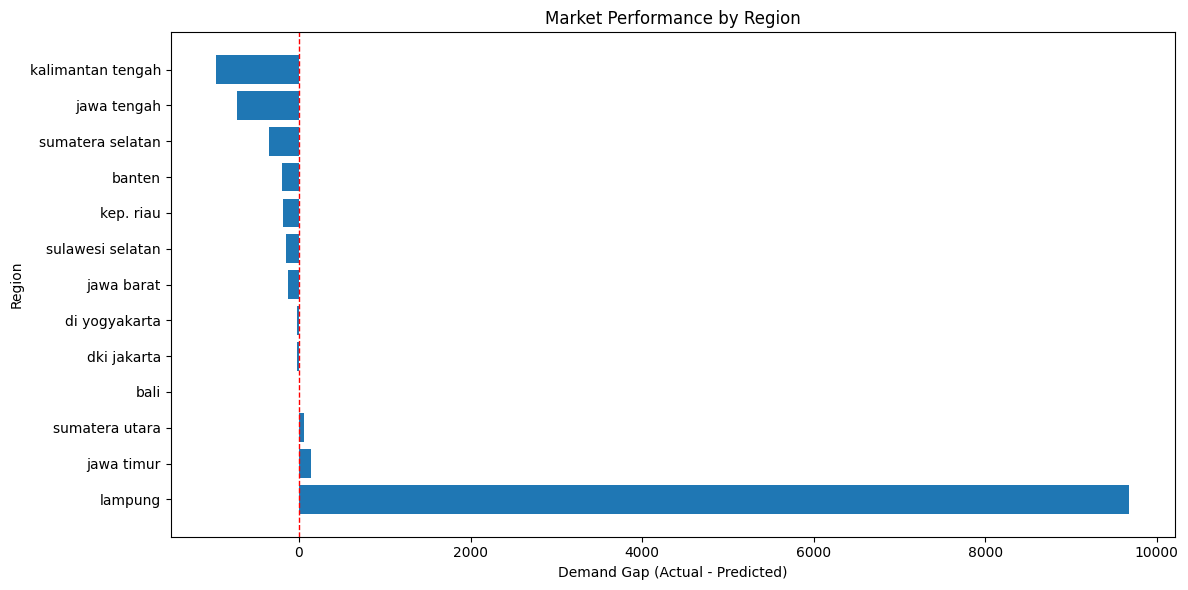

In [21]:
# Visualize demand gaps by region
plt.figure(figsize=(12, 6))
plt.barh(region_analysis["region"], region_analysis["demand_gap"])
plt.xlabel("Demand Gap (Actual - Predicted)")
plt.ylabel("Region")
plt.title("Market Performance by Region")
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

# Positive gap = Overperforming (actual sales > predicted)
# Negative gap = Underperforming (actual sales < predicted)

TUNING OUR BEST PERFORMING MACHINE LEARNING MODEL: STILL ON PROGRESS!

In [22]:
# Use randomized search CV to tune the Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

rf_random = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_grid,
    n_iter=30,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    random_state=42
)

rf_random.fit(x_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best CV Accuracy:", rf_random.best_score_)

NameError: name 'RF' is not defined

In [ ]:
rf_best = rf_random.best_estimator_
test_pred = rf_best.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, test_pred))

Test Accuracy: 0.6766990291262136


Although we already tuned this to the best settings, it is still not a good model accuracy, therefore we could see that we are still lacking with the features. Now it's time to add more features such as categorical features or even the 'customer review' (the comment from the customer in text form of that particular product). 

We proceed with vectorizing the text file to become numerical. Let's use OneHotEncoder for our categorical features, and using TF-IDF vectorizer for the customer review text (Interesting Note: Since tokopedia comments are in the Indonesian language we use the libarary Sastrawi in order to get the indonesian stop words to then be used by TF-IDF)! 

In [ ]:
# Use this libary for combing the numerical features with the categorical features
from sklearn.compose import ColumnTransformer

# This one is for the categorical features = [category, region]
from sklearn.preprocessing import OneHotEncoder

# This one is for the purely text feature (all suppose to be unique text data) = customer review
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# Get the indonesian stop words
stop_words_ind = StopWordRemoverFactory().get_stop_words()

from sklearn.pipeline import Pipeline

In [ ]:
numerical_features = ["price", "overall rating", "number sold", "total review", "salary"]
categorical_features = ["category", "region"] 
text_features = "customer review"

In [ ]:
X = data[numerical_features + categorical_features + [text_features]]

preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(
            max_features=5000,
            stop_words=stop_words_ind,
            ngram_range=(1,2),
            sublinear_tf=True
        ), text_features),
        
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        
        ("num", "passthrough", numerical_features)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", rf_best)
])

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=432
)

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Final Model with Text + Categorical Features Accuracy:",
      accuracy_score(Y_test, y_pred))

print(classification_report(Y_test, y_pred))

Final Model with Text + Categorical Features Accuracy: 0.9174757281553398
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       521
           1       0.92      0.91      0.92       509

    accuracy                           0.92      1030
   macro avg       0.92      0.92      0.92      1030
weighted avg       0.92      0.92      0.92      1030



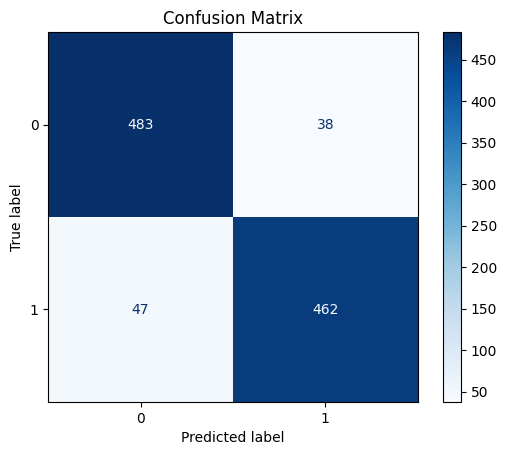

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    Y_test,
    display_labels=model.named_steps["classifier"].classes_,
    cmap="Blues",
    xticks_rotation="horizontal"
)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)
print("Prediction distribution:")
for u, c in zip(unique, counts):
    print(f"{u}: {c}")

Prediction distribution:
0: 530
1: 500


In [ ]:
unique, counts = np.unique(Y_test, return_counts=True)
print("True label distribution:")
for u, c in zip(unique, counts):
    print(f"{u}: {c}")

True label distribution:
0: 521
1: 509
